In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from helper import categorical_summarized
from helper import quantitative_summarized

# Contents
[1. Categorical Analysis ](#1.-Categorical-Analysis) <br>
[2. Quantitative Analysis](#2.-Quantitative-Analysis) <br>
[3. Clustering](#3.-Clustering) <br>
[4. Feature Selection](#4.-Feature-Selection) <br>

# Reading in the data

In [2]:
DATA_PATH = os.path.join(os.getcwd(), 'data', 'titanic')

In [3]:
train_df = pd.read_csv(os.path.join(DATA_PATH, 'train.csv'))
test_df = pd.read_csv(os.path.join(DATA_PATH, 'test.csv'))

## Peak into the data

In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# 1. Categorical Analysis

# Target Variable: Survival

In [7]:
c_palette = ['tab:blue', 'tab:orange']

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64
mode:  0    0
dtype: int64
0    549
1    342
Name: Survived, dtype: int64


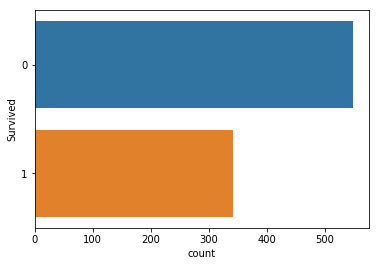

In [8]:
categorical_summarized(train_df, y = 'Survived', palette=c_palette)

# Gender

count      891
unique       2
top       male
freq       577
Name: Sex, dtype: object
mode:  0    male
dtype: object
male      577
female    314
Name: Sex, dtype: int64


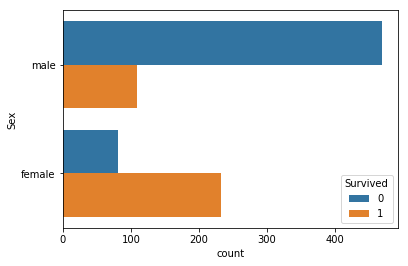

In [9]:
categorical_summarized(train_df, y = 'Sex', hue='Survived', palette=c_palette)

# Embarked

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object
mode:  0    S
dtype: object
S    644
C    168
Q     77
Name: Embarked, dtype: int64


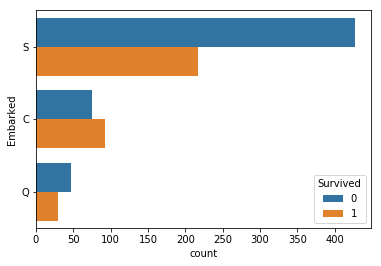

In [10]:
c_palette3 = ['tab:blue', 'tab:orange', 'tab:green']
categorical_summarized(train_df, y = 'Embarked', palette=c_palette3, hue = 'Survived')

[Back to Content Page](#Contents)

# 2. Quantitative Analysis

# Age

In [11]:
c_palette = ['tab:blue', 'tab:orange']

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64
mode:  0    24.0
dtype: float64


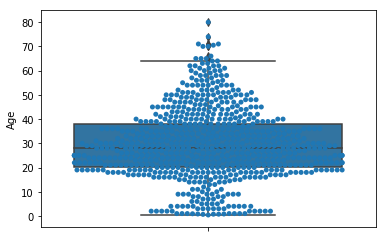

In [12]:
# univariate analysis
quantitative_summarized(dataframe= train_df, y = 'Age', palette=c_palette, verbose=False, swarm=True)

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64
mode:  0    24.0
dtype: float64


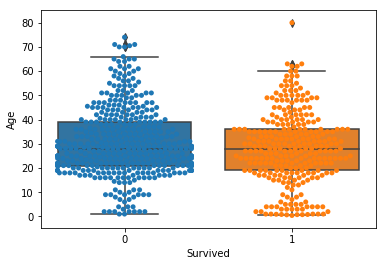

In [13]:
# bivariate analysis with target variable
quantitative_summarized(dataframe= train_df, y = 'Age', x = 'Survived', palette=c_palette, verbose=False, swarm=True)

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64
mode:  0    24.0
dtype: float64


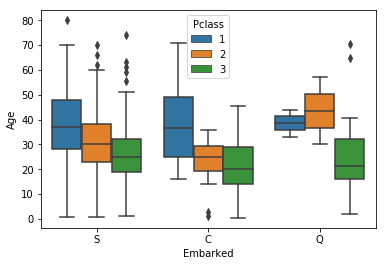

In [14]:
# multivariate analysis with Embarked variable and Pclass variable
quantitative_summarized(dataframe= train_df, y = 'Age', x = 'Embarked', hue = 'Pclass', palette=c_palette3, verbose=False, swarm=False)

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64
mode:  0    24.0
dtype: float64


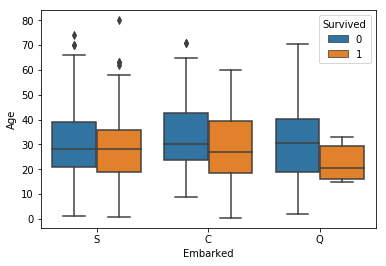

In [15]:
# multivariate analysis with Embarked variable and target variable
quantitative_summarized(dataframe= train_df, y = 'Age', x = 'Embarked', hue = 'Survived', palette=c_palette, verbose=False, swarm=False)

# Parent Child (Parch)

count    891.000000
mean       0.381594
std        0.806057
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Parch, dtype: float64
mode:  0    0
dtype: int64
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


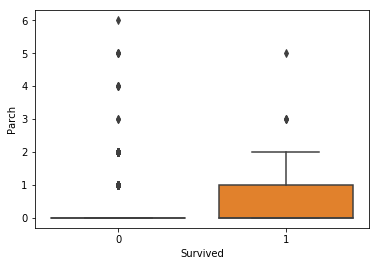

In [16]:
quantitative_summarized(dataframe=train_df, y = 'Parch', x = 'Survived', palette=c_palette3, verbose=True, swarm=False)

# Siblings Spouse (SibSp)

count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64
mode:  0    0
dtype: int64
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


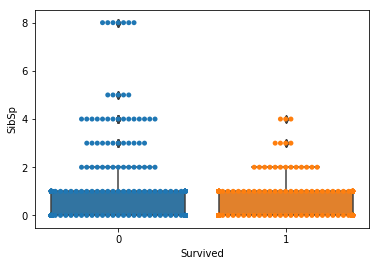

In [17]:
quantitative_summarized(dataframe=train_df, y = 'SibSp', x = 'Survived', palette=c_palette3, verbose=True, swarm=True)

# Fare

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64
mode:  0    8.05
dtype: float64


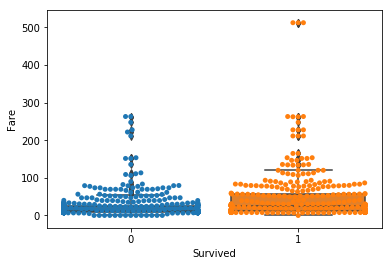

In [18]:
quantitative_summarized(dataframe=train_df, y = 'Fare', x = 'Survived', palette=c_palette, verbose=False, swarm=True)

[Back to Content Page](#Contents)

## Correlation Analysis

In [43]:
corr_df = train_df.drop(['PassengerId', 'Survived', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis = 1)
corr_df['Age'] = corr_df['Age'].fillna(value=corr_df['Age'].mode()[0])

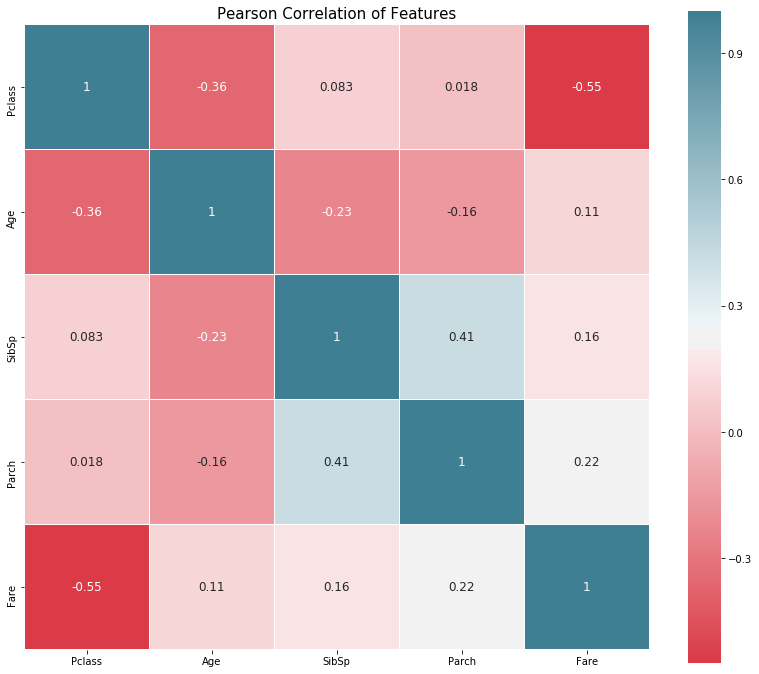

In [46]:
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', size = 15)
colormap = sns.diverging_palette(10, 220, as_cmap = True)
sns.heatmap(corr_df.corr(),
            cmap = colormap,
            square = True,
            annot = True,
            linewidths=0.1,vmax=1.0, linecolor='white',
            annot_kws={'fontsize':12 })
plt.show()

# 3. Clustering

## K Means clustering

In [19]:
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

In [20]:
def simple_preprocessing(dataframe, train=True):
    le = LabelEncoder()
    X = dataframe.drop(['PassengerId', 'Cabin', 'Name', 'Ticket'], axis=1)
    X['Age'] = X['Age'].fillna(value=X['Age'].mode()[0])
    X['Embarked'] = le.fit_transform(X['Embarked'].fillna(value=X['Embarked'].mode()[0]))
    X['Sex'] = np.where(X['Sex'] == 'male', 1, 0)
    
    if train:
        X = X.drop(['Survived'], axis=1)
        y = np.where(dataframe['Survived'] == 1, 'Alive', 'Dead')
        y = pd.get_dummies(y, columns=['Survived'])
        return X, y
    else:
        return X

In [21]:
samples = simple_preprocessing(train_df, train = False)

In [22]:
samples.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int64
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    891 non-null int64
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


Inertial of clusters:  142.69087449907238


/home/dh/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


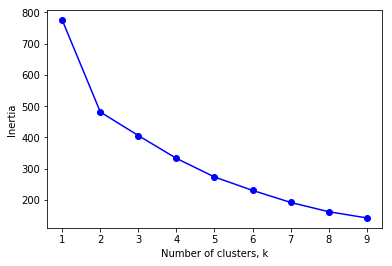

In [23]:
# inertias plot
# good k is a low inertia (how tight the data is in a cluster) and not too high

# Select Scaler
scaler = preprocessing.MinMaxScaler()
# scaler = preprocessing.RobustScaler()
# scaler = preprocessing.StandardScaler()

samples = scaler.fit_transform(samples)
ks = range(1,10)
inertias = []

for k in ks:
    k_mean = KMeans(n_clusters=k)
    k_mean.fit(samples)
    inertias.append(k_mean.inertia_)

plt.plot(ks, inertias, '-o', c = 'b')
# plt.title('Inertia Plot')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(ks)
print('Inertial of clusters: ', k_mean.inertia_)
plt.show()

In [24]:
samples = simple_preprocessing(train_df, train = False)
# Select Scaler
scaler = preprocessing.MinMaxScaler()
# scaler = preprocessing.RobustScaler()
# scaler = preprocessing.StandardScaler()

k_mean = KMeans(n_clusters=2)

sample_train,sample_val, gt_train, gt_val = train_test_split(samples, 
                                                                    train_df['Survived'],
                                                             test_size=0.2, random_state=99)

pipeline = make_pipeline(scaler, k_mean)
# labels = k_mean.predict(samples)
# centroids = k_mean.cluster_centers_
# centroids_x = centroids[:,0]
# centroids_y = centroids[:,1]
pipeline.fit(sample_train)
labels = pipeline.predict(sample_val)
print('Inertial of clusters: ', k_mean.inertia_)

Inertial of clusters:  381.05257210311584


/home/dh/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [25]:
ct_df = pd.DataFrame({'labels': labels, 'survived': gt_val})
# create crosstb
ct = pd.crosstab(ct_df['labels'], ct_df['survived'])
print(ct)

survived    0   1
labels           
0         112   0
1           1  66


In [26]:
(112 + 57)/179 * 100

94.41340782122904

In [27]:
sample_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 266 to 641
Data columns (total 8 columns):
Survived    712 non-null int64
Pclass      712 non-null int64
Sex         712 non-null int64
Age         712 non-null float64
SibSp       712 non-null int64
Parch       712 non-null int64
Fare        712 non-null float64
Embarked    712 non-null int64
dtypes: float64(2), int64(6)
memory usage: 50.1 KB


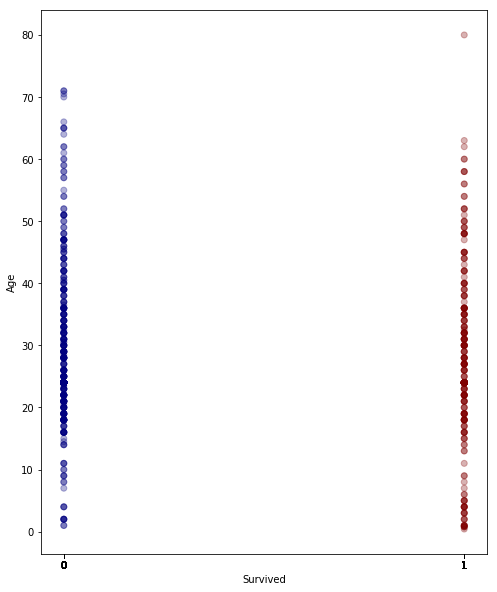

In [28]:
import matplotlib as mpl
fig = plt.figure(figsize = (8,10))
mpl.rcParams['image.cmap'] = 'jet'
labels = pipeline.predict(sample_train)
x_label = 'Survived'
y_label = 'Age'

plt.scatter(sample_train[x_label], sample_train[y_label], c = labels, alpha = 0.3)
plt.xlabel(x_label)
plt.xticks(sample_train[x_label])
plt.ylabel(y_label)
plt.show()

## Hierarchical Clustering

In [29]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

In [30]:
sample_train,sample_val, gt_train, gt_val = train_test_split(train_df, 
                                                                    train_df['Survived'],
                                                             test_size=0.05, random_state=99)

In [31]:
sample_val_processed = simple_preprocessing(sample_val, train = False)
sample_val_processed = scaler.fit_transform(sample_val_processed)

/home/dh/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [32]:
mergings = linkage(sample_val_processed, method='complete')

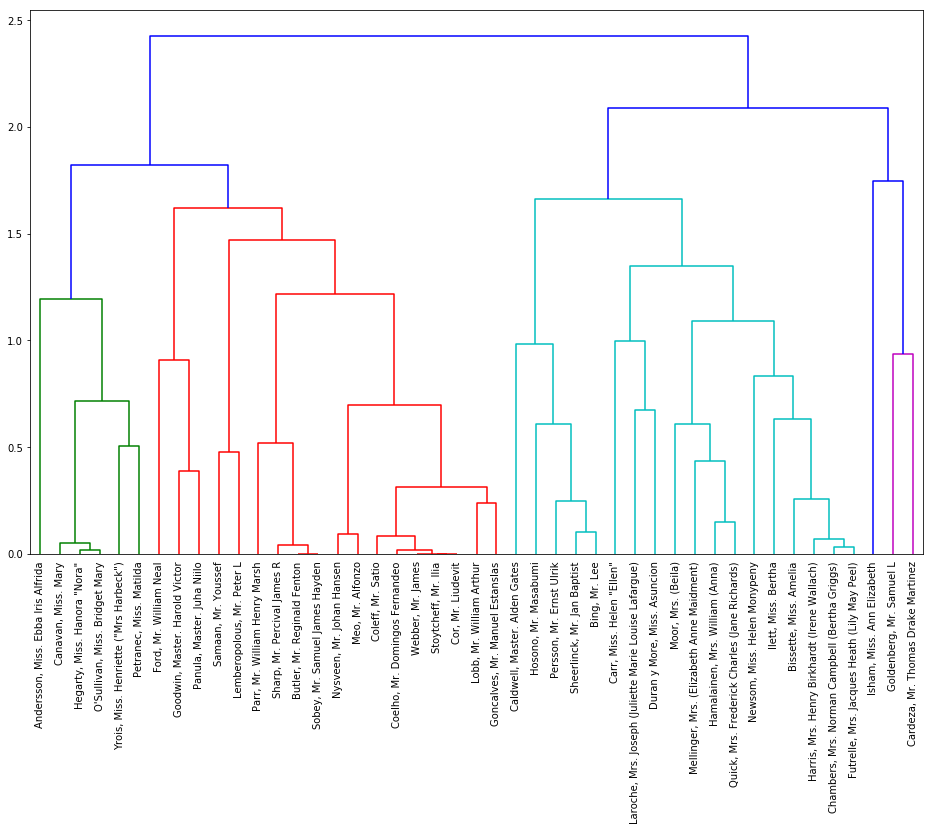

In [33]:
fig = plt.figure(figsize = (16,10))
dendrogram(mergings,
           labels=np.array(sample_val['Name']),
           leaf_rotation=90,
           leaf_font_size=10)
plt.show()

[Back to Content Page](#Contents)

# 4. Feature Selection
train: training data <br>
val: data we used to validate. They have ground truth of the target variable <br>
test: testing data. No ground truth of the target variable

In [34]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
X_train, y_train = simple_preprocessing(train_df)
X_train,X_val, y_train,y_val = train_test_split(X_train, y_train,test_size=0.2, random_state=99)
X_test = simple_preprocessing(test_df, train=False)

In [ ]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape

In [ ]:
X_train.head()

In [ ]:
y_train.head()

In [ ]:
X_test.head()

In [ ]:
rf_clf = RandomForestClassifier(n_estimators = 500, max_depth=12)
rf_clf.fit(X_train, y_train)
rf_y_pred = rf_clf.predict(X_val)

print("Accuracy:", metrics.accuracy_score(y_val, rf_y_pred))
print('='*80)
print(metrics.classification_report(y_val, rf_y_pred))

In [ ]:
pd.Series(rf_clf.feature_importances_, index = X_train.columns).nlargest(9).plot(kind = 'barh',
                                                                               figsize = (10, 10),
                                                                              title = 'Feature importance from RandomForest').invert_yaxis();

In [ ]:
xgb_clf = XGBClassifier(max_depth=12, learning_rate=1e-4,n_estimators=500)
xgb_clf.fit(X_train, np.argmax(np.array(y_train), axis = 1))
xgb_y_pred = xgb_clf.predict(X_val)

print("Accuracy:", metrics.accuracy_score(np.argmax(np.array(y_val), axis = 1), xgb_y_pred))
print('='*80)
print(metrics.classification_report(np.argmax(np.array(y_val), axis = 1), xgb_y_pred))

In [ ]:
pd.Series(xgb_clf.feature_importances_, index = X_train.columns).nlargest(9).plot(kind = 'barh',
                                                                               figsize = (10, 10),
                                                                              title = 'Feature importance from XGBoost').invert_yaxis();

[Back to Content Page](#Contents)